Initial state:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Probabilities: [4.93488874e-03 5.87747175e-39 2.21843253e-03 1.05323350e-02
 3.16275398e-03 6.02786619e-04 2.50442578e-04 9.55792517e-03
 3.79780112e-03 7.21809357e-16 2.15630904e-03 7.55442329e-03
 6.29921287e-03 3

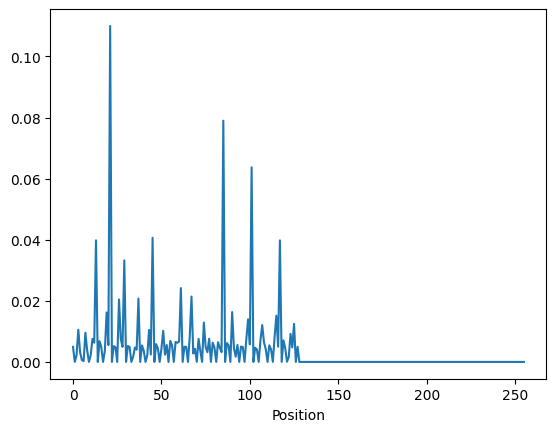

In [49]:
import time
import pennylane as qml
from pennylane import qjit
from pennylane import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for saving the image

SIZE = 8 # position space
start_time = time.time()
s = SIZE
wires_x = list(range(s)) #[0,1,2,3,4,5]
coin = [s] # coin space

def shift_op():
     for index in range(len(wires_x)-1, 0, -1):
         control_values = [1] * index
         qml.ctrl(qml.PauliX, control=wires_x[:index], control_values=control_values)(wires=wires_x[index])
     qml.PauliX(wires_x[0])

def shift_op_Plus():
     for index in range(len(wires_x)-1, 0, -1):
         control_values = [1] * index
         qml.ctrl(qml.PauliX, control=wires_x[:index], control_values=control_values)(wires=wires_x[index])
     qml.PauliX(wires_x[0])

def shift_op_Minus():
     for index in range(len(wires_x)-1, 0, -1):
        control_values = [1] * (inverted_index := index - 1)

        qml.ctrl(qml.PauliX, control=wires_x[:inverted_index], control_values=control_values)(wires=wires_x[index])
     qml.PauliX(wires_x[-1])

#@qml.qnode(qml.device("qiskit.basicsim", wires=(wires_x + coin)))
#@qml.qnode(qml.device("lightning.qubit", wires=(wires_x + coin)))
@qml.qnode(qml.device("default.qubit", wires=(wires_x + coin)))


def circuit(steps, state):
     #qml.BasisState(state, wires=wires_x)
     #qml.StatePrep(state, wires=(wires_x))
     #print(qml.)
     #qml.PauliX(coin)
     for i in range(steps[0]): 
        qml.H(coin)
        qml.ctrl(shift_op_Plus, control=coin)()
#        qml.ctrl(shift_op_Minus, control=coin)()
        qml.ctrl(qml.adjoint(shift_op), control=coin, control_values=[0])()
     return qml.probs(wires=wires_x)

steps = [2**(s-1)] 
state = [0]*(2**(s))
state[2**((s-1))] = 1
print("Initial state: ", state)
# Run the circuit
probabilities = circuit(steps, state)
print("Probabilities:", probabilities)
# Plot the probability distribution
plt.plot(probabilities)
plt.xlabel("Position")
plt.show()
_ = qml.draw_mpl(circuit, style="pennylane")(steps, state)